Ref: https://www.youtube.com/watch?v=h56M5iUVgGs&t=1933s
https://www.kaggle.com/tasnimnishatislam/eda-and-basics

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Load Yolo
net = cv2.dnn.readNet("/kaggle/input/yolo-coco-data/yolov3.weights", "/kaggle/input/yolo-coco-data/yolov3.cfg")
classes = []
with open("/kaggle/input/yolo-coco-data/coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]

In [17]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size = (len(classes), 3))

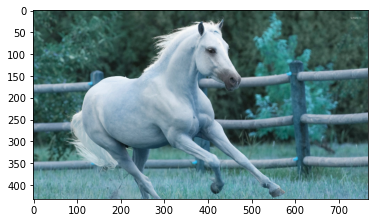

In [18]:
#loading image
img = cv2.imread("/kaggle/input/images-for-testing/horse.jpg")
img = cv2.resize(img, None, fx = 0.4, fy = 0.4)
height, width, channels = img.shape
plt.imshow(img)

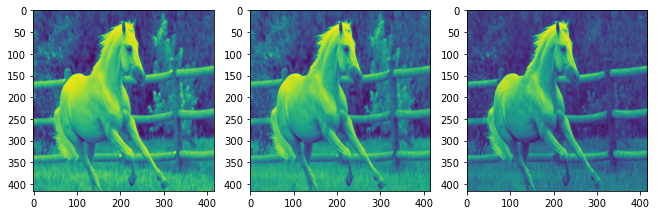

In [19]:
#Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop = False)
fig, axes = plt.subplots(ncols=3, figsize = (11,11))
for b in blob:
    for n, img_blob in enumerate(b):
        axes[n].imshow(img_blob)
plt.show()

In [20]:
net.setInput(blob)
outs = net.forward(output_layers)

[[0]]
horse


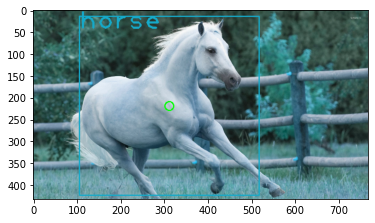

In [21]:
#Name of the object, showing informations on the screen
confidences = []
class_ids = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5: ]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1]* height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            # Rectangle Co-ordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
            
            cv2.circle(img, (center_x, center_y), 10, (0, 255, 0),2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
number_objects_detected = len(boxes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range (len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color= colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 4, color, 3)
        print(label)
    
myPlt = plt.imshow(img)

fig = myPlt.get_figure()
fig.savefig("output_detection.png")